<h1>Decision Tree model: airline</h1>

<h4>Pre - processing the Dataset</h4>

1. Read and initial checking of dataset

In [1]:
import pandas as pd

data = pd.read_csv('data/airline.csv')

data.shape

(129880, 23)

2. Variable Standardization

- Convert target column into numerical class

In [2]:
data['satisfaction'] = data['satisfaction'].map({'dissatisfied':0,'satisfied':1})

result = data['satisfaction'].value_counts()
print(result)

satisfaction
1    71087
0    58793
Name: count, dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
#check the description
data.describe()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,0.547328,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,0.497757,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
#check the null values in our dataset
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


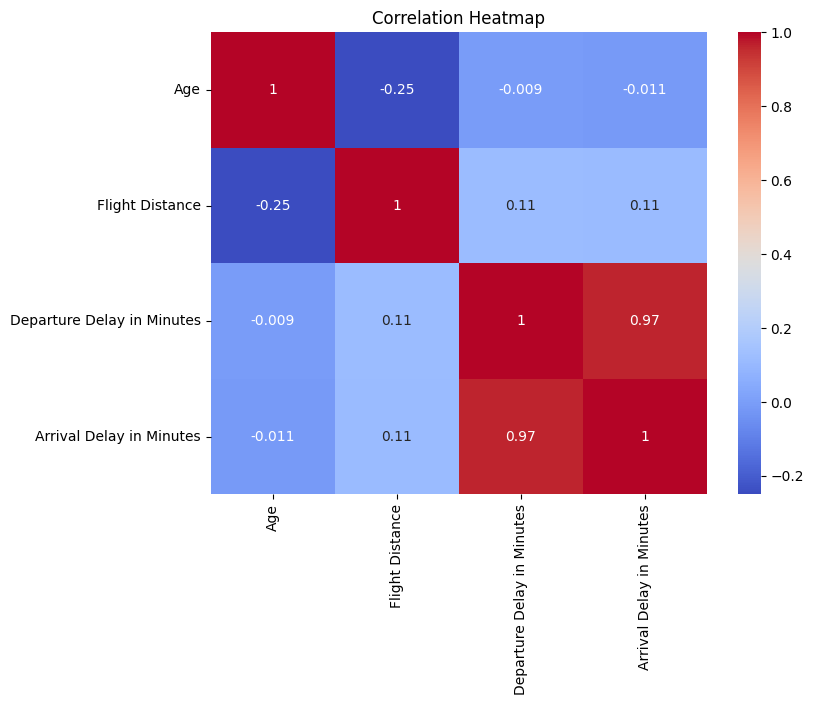

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(8, 6))

numerical_columns = [
    'Age', 
    'Flight Distance',
    'Departure Delay in Minutes', 
    'Arrival Delay in Minutes'
]

# Calculate the correlation matrix for the numerical columns
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

satisfaction
1    71087
0    58793
Name: count, dtype: int64
Total number of samples: 129880
Samples for Satisfied: 58793
Samples for Dissatisfied: 71087
Percentage of Satisfied: 45.27%
Percentage of Dissatisfied: 54.73%


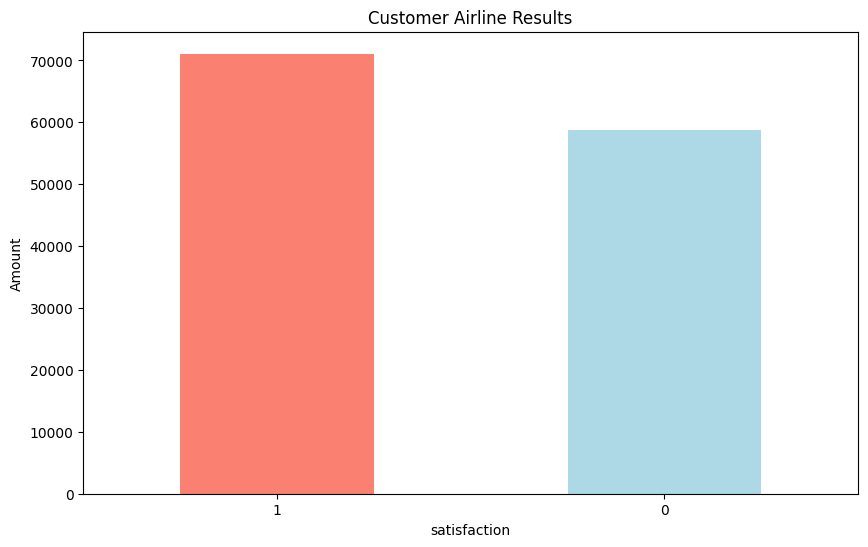

In [8]:
result = data['satisfaction'].value_counts()
print(result)

# Calculate the total number of samples
total_samples = len(data['satisfaction'])

# Calculate the percentage of each class
percentage_low_satisfaction = (result[0] / total_samples) * 100
percentage_high_satisfaction = (result[1] / total_samples) * 100

print("Total number of samples: {}".format(total_samples))
print("Samples for Satisfied: {}".format(result[0]))
print("Samples for Dissatisfied: {}".format(result[1]))

print("Percentage of Satisfied: {:.2f}%".format(percentage_low_satisfaction))
print("Percentage of Dissatisfied: {:.2f}%".format(percentage_high_satisfaction))


data['satisfaction'].value_counts().plot(kind = 'bar', figsize = (10, 6), color = ['salmon', 'lightblue'])

plt.title("Customer Airline Results")
plt.ylabel("Amount")
plt.xticks(rotation = 0)

plt.savefig("images/airline_plot.png")

3. Assign the feature columns to <i>x</i> and target column to <i>y</i>

In [9]:
feature_columns = [
    'Age', 
    'Flight Distance',
    'Seat comfort',
    'Departure/Arrival time convenient', 
    'Food and drink', 
    'Gate location', 
    'Inflight wifi service',
    'Inflight entertainment',
    'Ease of Online booking',
    'Online support', 
    'On-board service', 
    'Leg room service', 
    'Baggage handling', 
    'Checkin service', 
    'Cleanliness', 
    'Online boarding', 
    'Departure Delay in Minutes'
]

x = data[feature_columns]
y = data['satisfaction']

4. Split the data into train and test subset
5. Train the decision tree model with max_depth=3

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

6. Evaluation Scores

- Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print('Testing Accuracy:', accuracy_score(y_test, y_pred))

Testing Accuracy: 0.8527358587414023


- Classification report (Precision, Recall, f1-score)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     17554
           1       0.88      0.85      0.86     21410

    accuracy                           0.85     38964
   macro avg       0.85      0.85      0.85     38964
weighted avg       0.85      0.85      0.85     38964



- Confusion Matrix

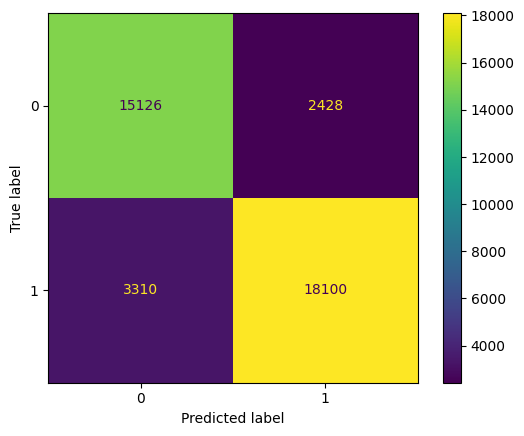

In [13]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()


- Cross validation score

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()

0.8126039421004003

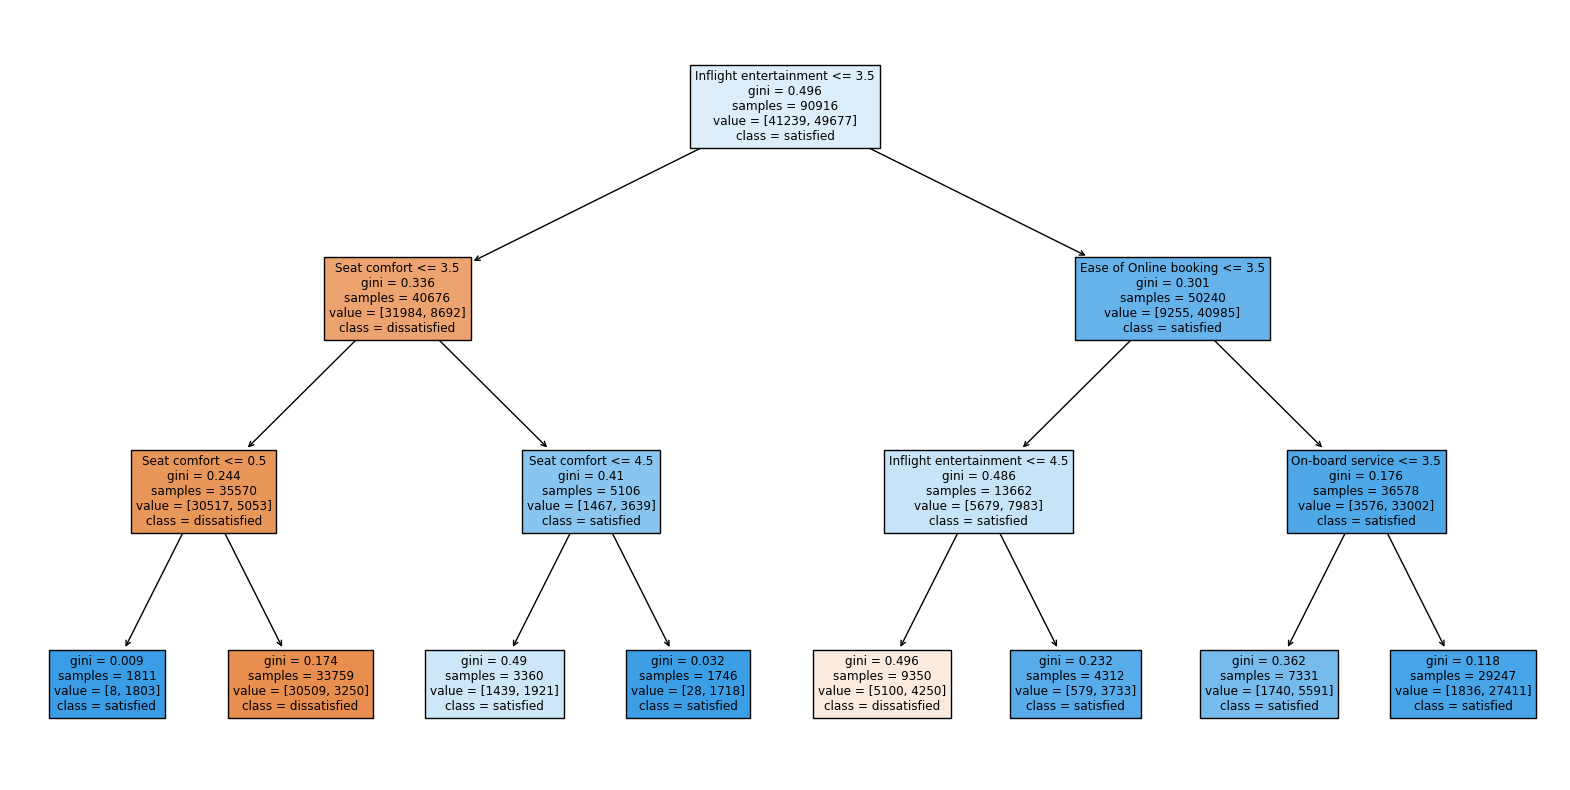

In [15]:
from sklearn.tree import plot_tree

# Plotting decision tree
plt.figure(figsize = (20, 10))
plot_tree(clf, filled = True, feature_names=x.columns.to_list(), class_names=['dissatisfied', 'satisfied'])
plt.savefig('Airline Customer Satisfaction Decision Tree')
plt.show()

In [16]:
data_importance = pd.DataFrame({'Features' : x.columns,'Importances' : clf.feature_importances_}).sort_values('Importances', ascending=False)
data_importance

,Features,Importances
7,Inflight entertainment,0.671872
2,Seat comfort,0.236139
8,Ease of Online booking,0.078110
10,On-board service,0.013880
15,Online boarding,0.000000
14,Cleanliness,0.000000
13,Checkin service,0.000000
12,Baggage handling,0.000000
11,Leg room service,0.000000
0,Age,0.000000


7. Prolog implementation by querying airline.pl

In [17]:
from pyswip import Prolog

prolog = Prolog()

prolog.consult('airline.pl')

data_pl = pd.read_csv('data/airline.csv')

data_pl['satisfaction'] = data_pl['satisfaction'].map({'dissatisfied':0,'satisfied':1})

# Create an empty list to store the satisfaction of Inflight entertainment and Seat comfort
pl_ent_seat = []
pl_ent_booking = []

for index, row in data_pl.iterrows():
    # Get the rating value from the current row
    inflight_entertainment = row['Inflight entertainment']
    seat_comfort = row['Seat comfort']
    
    # Query the Prolog engine to check if the rating level is above the rule threshold
    result = bool(list(prolog.query(f"dissatisfied({inflight_entertainment}, {seat_comfort}, entertainment_seat)")))

    # Append 1 or 0 to the new lists based on the query result
    pl_ent_seat.append(0 if result else 1)

# Add the lists as new columns in the DataFrame
data_pl['Entertainment and Seat'] = pl_ent_seat

# Iterate over each row in the CSV file
for index, row in data_pl.iterrows():
    # Get the rating value from the current row
    inflight_entertainment = row['Inflight entertainment']
    booking = row['Ease of Online booking']

    # Query the Prolog engine to check if the rating level is above the rule threshold
    result = bool(list(prolog.query(f"dissatisfied({inflight_entertainment}, {booking}, entertainment_booking)")))

    # Append 1 or 0 to the new lists based on the query result
    pl_ent_booking.extend([0 if result else 1])
    
# Add the lists as new columns in the DataFrame
data_pl['Entertainment and Booking'] = pl_ent_booking

# Show the head of the new DataFrame
data_pl.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Entertainment and Seat,Entertainment and Booking
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0.0,1,0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,305.0,1,1
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0.0,1,1
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0.0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0.0,1,1


8. Retrained decision tree model 

In [18]:
# exclude 'Inflight entertainment', 'Seat comfort' and 'Ease of Online booking' from the feature columns
# include 'Entertainment and Seat' and 'Entertainment and Booking' in the feature columns
feature_columns_pl = [
    'Age',
    'Flight Distance',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Online support',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding',
    'Departure Delay in Minutes',
    'Entertainment and Seat',
    'Entertainment and Booking'
]

x_pl = data_pl[feature_columns_pl]
y_pl = data_pl['satisfaction']

In [19]:
x_train_pl, x_test_pl, y_train_pl, y_test_pl = train_test_split(x_pl, y_pl, test_size = 0.3, random_state=42)

# Create Decision Tree Classifier object
model = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
model = model.fit(x_train_pl, y_train_pl)

# Predict the response for test dataset
y_pred_pl = model.predict(x_test_pl)

- Accuracy score

In [20]:
print('Testing Accuracy:', accuracy_score(y_test_pl, y_pred_pl))

Testing Accuracy: 0.8678267118365671


- Classification report (Precision, Recall, f1-score)

In [21]:
print(classification_report(y_test_pl, y_pred_pl))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     17554
           1       0.88      0.88      0.88     21410

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964



- Confusion Matrix

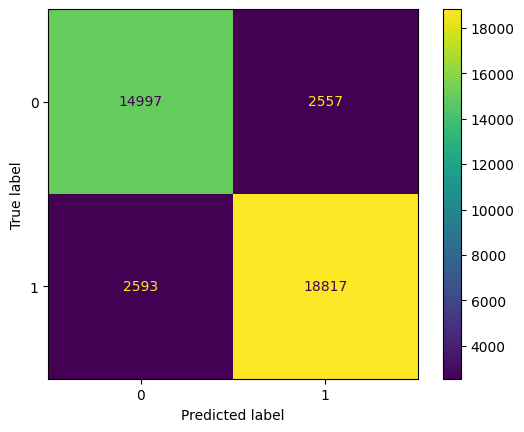

In [22]:
# Confusion Matrix 
cm = confusion_matrix(y_test_pl, y_pred_pl)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(cm)

# Plot the confusion matrix
disp.plot()

- Cross validation score

In [23]:
cross_val_score(model, x_pl, y_pl, cv=5, scoring='accuracy').mean()

0.8428626424391746

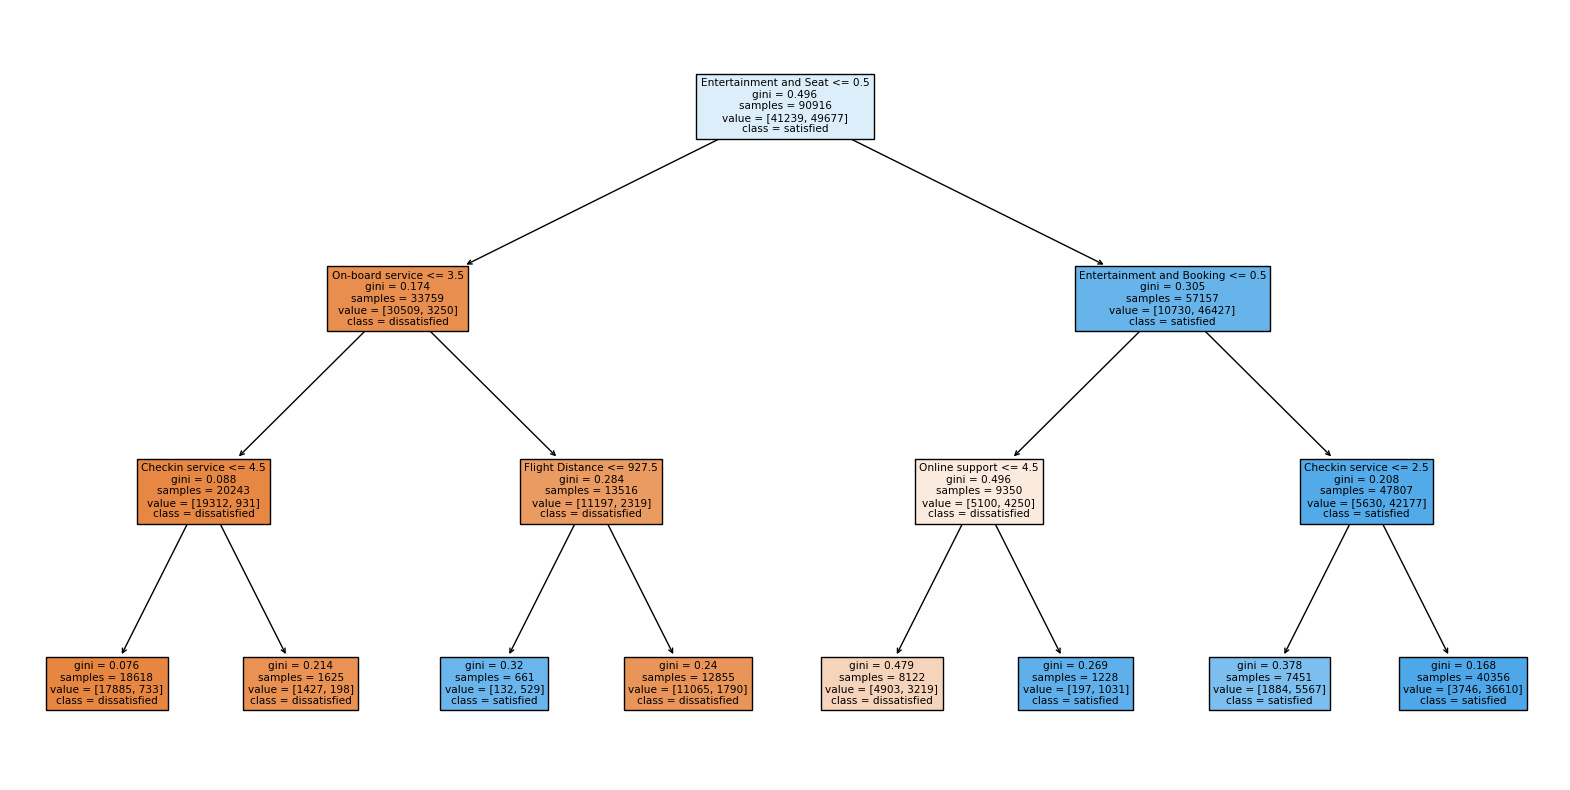

In [24]:
# Plotting decision tree
plt.figure(figsize = (20, 10))
plot_tree(model, filled = True, feature_names=x_pl.columns.to_list(), class_names=['dissatisfied', 'satisfied'])
plt.savefig('Airline Customer Satisfaction Decision Tree')
plt.show()